In [1]:
from importlib.resources import files
from pathlib import Path

from gemdat import SitesData, Trajectory, plots

/home/vikko/local_projects/GEMDAT/.venv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
# Get our trajectory
trajectory = Trajectory.from_vasprun(Path('../../example/vasprun.xml'))

# Create a new trajectory object that only consists of Lithium
diff_trajectory = trajectory.filter('Li')
diff_trajectory.__str__()

'<gemdat.trajectory.Trajectory object at 0x7fe6e8144f50>'

In [3]:
# Lets try to load a CIF file
from gemdat.io import read_cif

structure = read_cif(files('gemdat') / 'data/argyrodite.cif')
print("\n".join(
    structure.__repr__().split('\n')[:20]))  # only print the first 20 lines

Structure Summary
Lattice
    abc : 9.924 9.924 9.924
 angles : 90.0 90.0 90.0
 volume : 977.3728410239999
      A : 9.924 0.0 6.076697417369166e-16
      B : 1.5959009175390938e-15 9.924 6.076697417369166e-16
      C : 0.0 0.0 9.924
    pbc : True True True
PeriodicSite: 48h (Li) (1.816, 1.816, 0.2382) [0.183, 0.183, 0.024]
PeriodicSite: 48h (Li) (1.816, 6.778, 5.2) [0.183, 0.683, 0.524]
PeriodicSite: 48h (Li) (6.778, 1.816, 5.2) [0.683, 0.183, 0.524]
PeriodicSite: 48h (Li) (6.778, 6.778, 0.2382) [0.683, 0.683, 0.024]
PeriodicSite: 48h (Li) (9.686, 1.816, 8.108) [0.976, 0.183, 0.817]
PeriodicSite: 48h (Li) (9.686, 6.778, 3.146) [0.976, 0.683, 0.317]
PeriodicSite: 48h (Li) (4.724, 1.816, 3.146) [0.476, 0.183, 0.317]
PeriodicSite: 48h (Li) (4.724, 6.778, 8.108) [0.476, 0.683, 0.817]
PeriodicSite: 48h (Li) (8.108, 0.2382, 8.108) [0.817, 0.024, 0.817]
PeriodicSite: 48h (Li) (8.108, 5.2, 3.146) [0.817, 0.524, 0.317]
PeriodicSite: 48h (Li) (3.146, 0.2382, 3.146) [0.317, 0.024, 0.317]


In [4]:
# The supercell is off for this loaded structure, so lets correct it to match the data
# Be carefull to only execute this once, otherwise the dimensions just keep multiplying like tribbles
structure.make_supercell((2, 1, 1))

# Lets inspect the lattice
structure.lattice

Lattice
    abc : 19.848 9.924 9.924
 angles : 90.0 90.0 90.0
 volume : 1954.7456820479997
      A : 19.848 0.0 1.2153394834738332e-15
      B : 1.5959009175390938e-15 9.924 6.076697417369166e-16
      C : 0.0 0.0 9.924
    pbc : True True True

In [5]:
# Generate the sites from the structure loaded from the CIF file
sites = SitesData(
    structure=structure,
    trajectory=trajectory,
    floating_specie='Li',
)

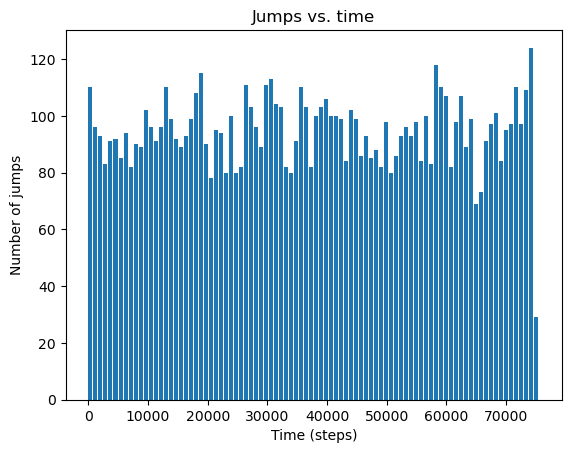

In [6]:
plots.jumps_vs_time(sites=sites, binsize=840);

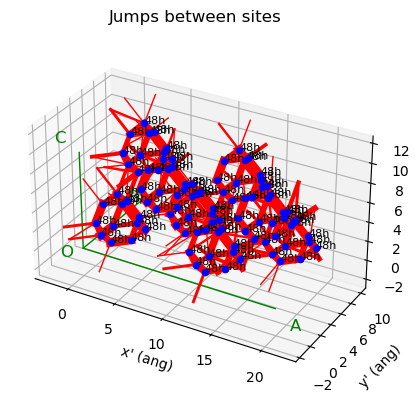

In [7]:
plots.jumps_3d(sites=sites);